In [1]:
# Importing the libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.metrics import confusion_matrix

In [2]:
#Check working directory
os.getcwd()

'C:\\Users\\compu\\Choudhary Py\\Project'

In [3]:
# Set working directory
os.chdir("E:\project")

In [4]:
# Importing the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [5]:
dataset.shape

(1000, 2)

In [6]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
dataset['Review'] = dataset['Review'].replace('',np.nan)
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

# Sentiment Analysis

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [9]:
dataset['sentiment'] = dataset['Review'].apply(lambda Review: sid.polarity_scores(Review))
dataset.head()

,Review,Liked,sentiment
0,Wow... Loved this place.,1,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp..."
1,Crust is not good.,0,"{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'comp..."
2,Not tasty and the texture was just nasty.,0,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou..."
3,Stopped by during the late May bank holiday of...,1,"{'neg': 0.093, 'neu': 0.585, 'pos': 0.322, 'co..."
4,The selection on the menu was great and so wer...,1,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp..."


In [10]:
dataset['negative'] = dataset['sentiment'].apply(lambda score_dict: score_dict['neg'])
dataset['neutral'] = dataset['sentiment'].apply(lambda score_dict: score_dict['neu'])
dataset['positive'] = dataset['sentiment'].apply(lambda score_dict: score_dict['pos'])
dataset['compound'] = dataset['sentiment'].apply(lambda score_dict: score_dict['compound'])
dataset['score'] = dataset['compound'].apply(lambda c: 1 if c>=0 else 0)
dataset.head()

,Review,Liked,sentiment,negative,neutral,positive,compound,score
0,Wow... Loved this place.,1,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.000,0.435,0.565,0.5994,1
1,Crust is not good.,0,"{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'comp...",0.445,0.555,0.000,-0.3412,0
2,Not tasty and the texture was just nasty.,0,"{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compou...",0.340,0.660,0.000,-0.5574,0
3,Stopped by during the late May bank holiday of...,1,"{'neg': 0.093, 'neu': 0.585, 'pos': 0.322, 'co...",0.093,0.585,0.322,0.6908,1
4,The selection on the menu was great and so wer...,1,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",0.000,0.728,0.272,0.6249,1


In [11]:
# Making the Confusion Matrix
cm = confusion_matrix(dataset['Liked'], dataset['score'])

#let us save TP, TN, FP, FN
TN = cm[0,0]
FN = cm[1,0]
TP = cm[1,1]
FP = cm[0,1]

# check accuracy of model
accuracy = ((TP+TN)*100)/(TP+TN+FP+FN)
# False Negative rate 
FNR = (FN*100)/(FN+TP)
# calculating precision
Precision = (TP*100) / (TP + FP)
# calculating Recall
Recall = (TP*100) / (TP + FN)
# calculating F1 score
F1_Score = (2 * Precision * Recall) / (Precision + Recall)

print(cm)
print('Accuracy is: %0.3f' %accuracy)
print('FNR is: %0.3f' %FNR)
print('Precission is: %0.3f' %Precision)
print('Recall is: %0.3f' %Recall)
print('F1 Score is: %0.3f' %F1_Score)

[[240 260]
 [ 17 483]]
Accuracy is: 72.300
FNR is: 3.400
Precission is: 65.007
Recall is: 96.600
F1 Score is: 77.715


# Cleaning Data

In [12]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not') # needed 'not' for review

In [13]:
corpus = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset[dataset.columns[0]][i]) # removing everything except alphabets
    review = review.lower() 
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

# Bag of Words

In [14]:
# Creating the Bag of Words model
# it returns a Document-Term matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500) # select max_features later by looking at length
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values
X.shape

(1000, 1500)

# Sampling

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Model Development

In [16]:
# libraries to make pr and roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# function to create PR and ROC curve
def roc_pr_curve(y_pred):
    
    # Finding PR and ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall, precision)
    # plot no skill roc curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot model roc curve
    # calculate roc curve for model
    plt.plot(fpr, tpr, marker='.', label='area = %0.2f' % roc_auc)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

    #Precision-Recall Curve
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(y_test[y_test == 1]) / len(y_test)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
    # plot the model precision-recall curve
    plt.plot(recall, precision, marker='.', label='area = %0.2f' % pr_auc)
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

# Naive Bayes

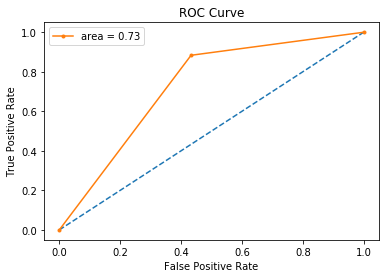

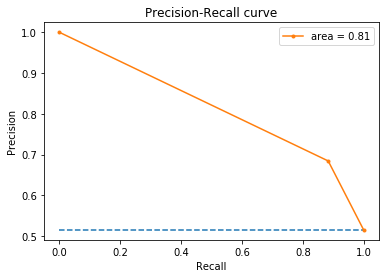

[[55 42]
 [12 91]]
Accuracy is: 73.000
FNR is: 11.650
Precission is: 68.421
Recall is: 88.350
F1 Score is: 77.119


In [17]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB().fit(X_train, y_train)

# Predicting the Test set results
nb_pred = nb_classifier.predict(X_test)

# Making the Confusion Matrix
cm_nb = confusion_matrix(y_test, nb_pred)

# let us save TP, TN, FP, FN
TN = cm_nb[0,0]
FN = cm_nb[1,0]
TP = cm_nb[1,1]
FP = cm_nb[0,1]

# check accuracy of model
accuracy = ((TP+TN)*100)/(TP+TN+FP+FN)
# False Negative rate 
FNR = (FN*100)/(FN+TP)
# calculating precision
Precision = (TP*100) / (TP + FP)
# calculating Recall
Recall = (TP*100) / (TP + FN)
# calculating F1 score
F1_Score = (2 * Precision * Recall) / (Precision + Recall)

# PR and ROC curve
roc_pr_curve(nb_pred)

print(cm_nb)
print('Accuracy is: %0.3f' %accuracy)
print('FNR is: %0.3f' %FNR)
print('Precission is: %0.3f' %Precision)
print('Recall is: %0.3f' %Recall)
print('F1 Score is: %0.3f' %F1_Score)

# Word cloud

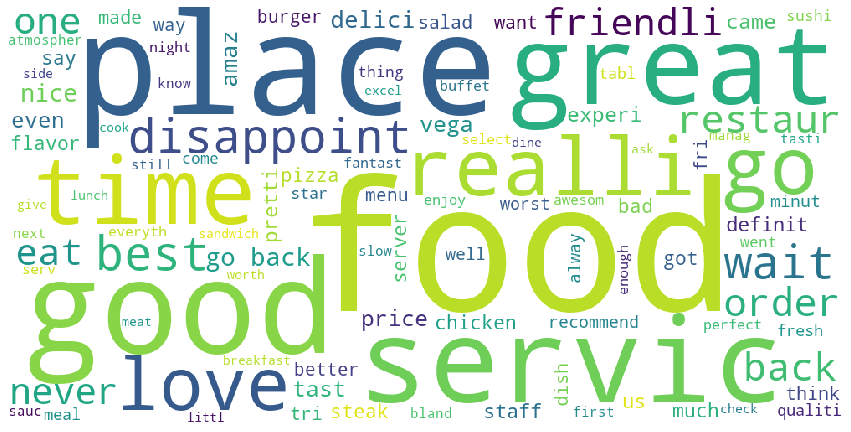

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width = 1000, height = 500, max_words=100, background_color="white").generate(' '.join(corpus))
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")